In [70]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
import time
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA

In [71]:
# read training and test data and combine them into one dataframe
df_train = pd.read_csv('/content/drive/MyDrive/UMD/DATA 604/fashion_mnist_data/fashion-mnist_train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/UMD/DATA 604/fashion_mnist_data/fashion-mnist_test.csv')
df = pd.concat([df_train,df_test])
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
# sort the dataframe with respect to the class labels
df = df.sort_values(by='label')
df.reset_index(drop=True, inplace=True)

In [73]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,1,0,...,144,151,140,0,0,3,0,0,0,0
1,0,0,0,0,0,5,0,0,28,130,...,102,141,198,68,0,0,5,0,0,0
2,0,0,0,0,0,0,0,0,0,32,...,0,41,186,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,21,...,15,15,31,29,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,30,...,0,0,0,0,0,0,0,0,0,0


## Question 1

In [86]:
# define feature set and outcome
X = df.drop(['label'],axis=1)
y = df['label']

In [87]:
# fit a PCA model on the dataset
pca = PCA(n_components=784)
pca.fit(X)

PCA(n_components=784)

In [88]:
pca.components_
#  The components are sorted by decreasing explained_variance_.
# pca.explained_variance_

array([[ 2.85602695e-07,  3.45351427e-06,  2.18071429e-05, ...,
         1.07866208e-03,  9.52361214e-05,  9.68857078e-06],
       [ 9.21180463e-09,  4.47804682e-06,  1.58084495e-05, ...,
         2.38764305e-03,  7.26722627e-04,  6.43054615e-05],
       [ 3.91535099e-07, -5.16264283e-07,  1.19015202e-05, ...,
        -4.52020622e-04, -9.26439957e-04, -6.93580276e-05],
       ...,
       [-2.13282531e-02,  4.93069655e-01, -8.36711358e-02, ...,
         1.29390407e-04,  7.13404247e-04, -5.21620966e-04],
       [ 2.28432978e-01,  8.32308538e-01, -1.31464927e-01, ...,
         3.57870881e-05, -7.54918609e-05,  9.21987738e-04],
       [ 9.73256643e-01, -1.85210673e-01,  2.68217674e-02, ...,
         2.76414193e-05, -1.48893125e-04, -1.04583483e-03]])

In [89]:
pca.components_.shape

(784, 784)

Text(0.5, 1.0, 'First PCA component')

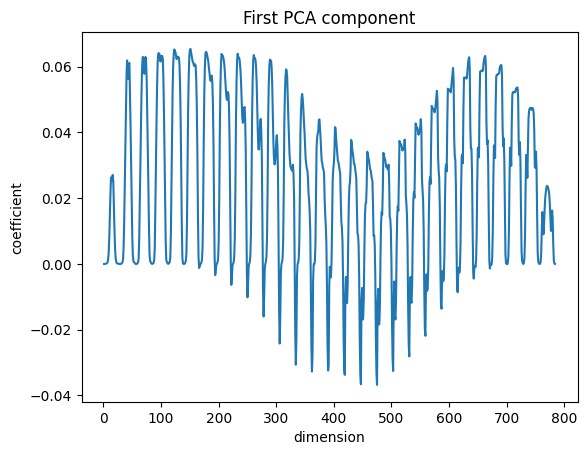

In [90]:
# Plot the first principal component as a function on [1, 784].
x = range(1,785)
y_1 = pca.components_[0]
plt.plot(x,y_1)
plt.xlabel('dimension')
plt.ylabel('coefficient')
plt.title('First PCA component')

In [92]:
print('Variance captured by first principal is ',pca.explained_variance_[0])

Variance captured by first principal is  1285715.2381453644


Text(0.5, 1.0, 'Last PCA component')

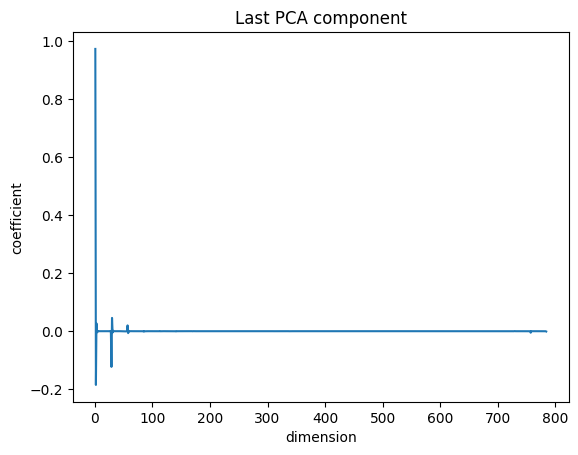

In [79]:
# Plot the last principal component as a function on [1, 784].
y_2 = pca.components_[-1]
plt.plot(x,y_2)
plt.xlabel('dimension')
plt.ylabel('coefficient')
plt.title('Last PCA component')

In [94]:
print('Variance captured by last principal is ',pca.explained_variance_[-1])

Variance captured by last principal is  0.005967793761976638


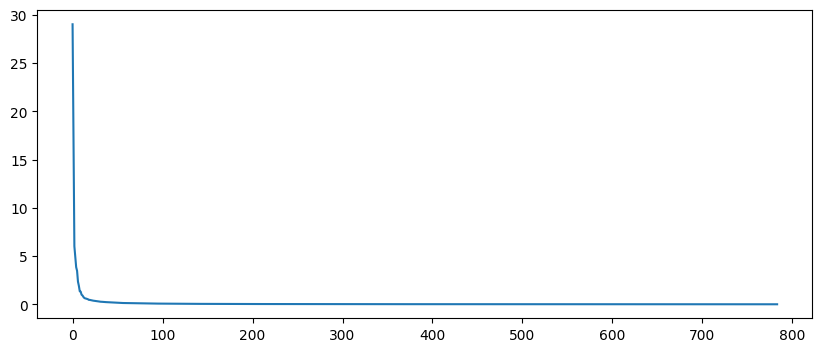

In [84]:
# Scree plot
from matplotlib.pyplot import figure
figure(figsize=(10, 4))
percentage_info_captured = pca.explained_variance_*100/np.sum(pca.explained_variance_)
x = range(0,784)
plt.plot(x,percentage_info_captured)

## Question 2

In [95]:
# transform the data to be represented in the basis of the principal components
X_reduced = pca.transform(X)

In [96]:
X_reduced.shape

(70000, 784)

In [97]:
X_reduced[0].shape

(784,)

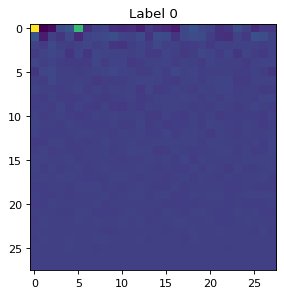

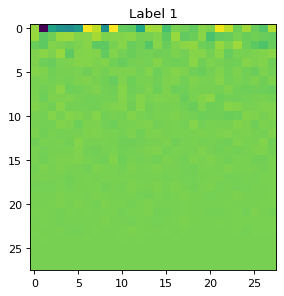

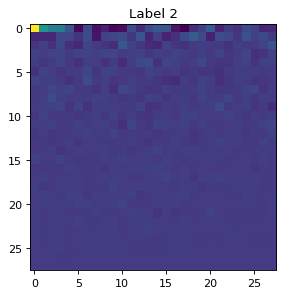

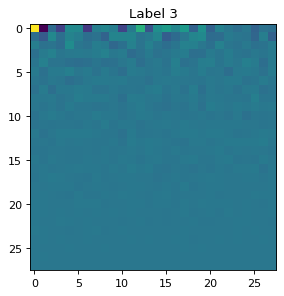

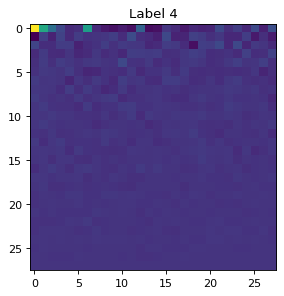

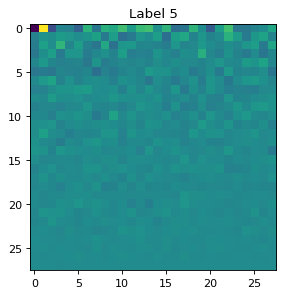

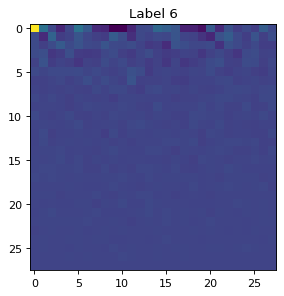

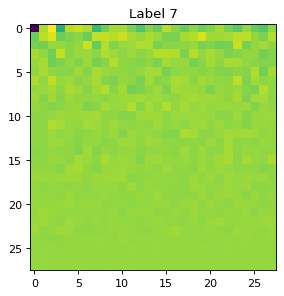

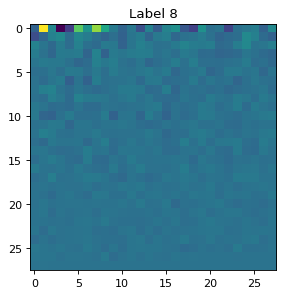

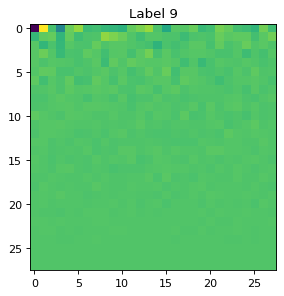

In [83]:
# since we have sorted the dataframe before with respect to labels, it will have images of label '0' from
# index 0 to 6999, label '1' from 7000 to 13999, and so on.
from matplotlib.pyplot import figure
for i in range(10):  
  image = np.reshape(X_reduced[i*7000],(28,28))
  figure(figsize=(4, 4), dpi=80)
  plt.imshow(image)
  plt.title('Label '+str(i))
  plt.show()

## Question 3

In [41]:
# optimal parameters and method from Part 1
def split_train_test_2(df,N):
  X = df.drop(['label'],axis = 1)
  y = df['label']
  X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=1-N*10/len(X), random_state=1, stratify=y)
  # stratify option ensures equal distribution amongst classes
  return X_train, X_test, y_train, y_test

def train_knn_l1(X_train, y_train):
  start_train = time.time()
  knn_model = KNeighborsClassifier(n_neighbors=20,algorithm='brute',metric='manhattan')
  knn_model.fit(X_train, y_train)
  end_train = time.time()
  train_time = end_train - start_train
  print("Training time is %s seconds" % train_time)
  return knn_model

# Test a KNN model
def test_knn(knn_model,X_test, y_test):
  start_test = time.time()
  y_hat = knn_model.predict(X_test)
  end_test = time.time()
  test_time = end_test - start_test
  print("Testing time is %s seconds" % test_time)
  return y_hat

In [42]:
# Experiment 1
f1score = []
accuracy = []
for i in range(10,400,20):  
  pca = PCA(n_components=i)
  pca.fit(X)
  X_reduced = pca.transform(X)
  df_ = pd.DataFrame(X_reduced)
  df_['label'] = df['label']
  X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced  = split_train_test_2(df_,6100)
  knn_model_reduced = train_knn_l1(X_train_reduced, y_train_reduced)
  y_hat_reduced = test_knn(knn_model_reduced,X_test_reduced, y_test_reduced)
  f1score.append(f1_score(y_test_reduced,y_hat_reduced, average='micro'))
  accuracy.append(accuracy_score(y_test_reduced,y_hat_reduced))

Training time is 0.010372638702392578 seconds
Testing time is 10.284137964248657 seconds
Training time is 0.026644468307495117 seconds
Testing time is 26.383883237838745 seconds
Training time is 0.010162115097045898 seconds
Testing time is 41.78370666503906 seconds
Training time is 0.010445594787597656 seconds
Testing time is 58.97957706451416 seconds
Training time is 0.011847496032714844 seconds
Testing time is 73.6872410774231 seconds
Training time is 0.013152122497558594 seconds
Testing time is 87.63355684280396 seconds
Training time is 0.018963098526000977 seconds
Testing time is 107.90910863876343 seconds
Training time is 0.015587091445922852 seconds
Testing time is 116.44739818572998 seconds
Training time is 0.021203279495239258 seconds
Testing time is 135.0960636138916 seconds
Training time is 0.022280454635620117 seconds
Testing time is 149.52736043930054 seconds
Training time is 0.019118309020996094 seconds
Testing time is 164.22664165496826 seconds
Training time is 0.01943826

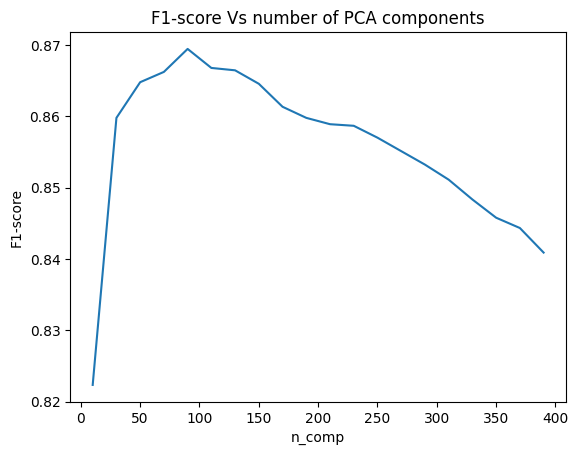

In [43]:
n_comp = [i for i in range(10,400,20)]
plt.plot(n_comp ,f1score,label='train')
plt.title("F1-score Vs number of PCA components")
plt.xlabel("n_comp")
plt.ylabel("F1-score")
plt.show()

In [45]:
10+20*np.where(f1score==max(f1score))[0][0]

90

In [56]:
# Experiment 2
f1score_ = []
accuracy_ = []
for i in range(90,110,2):  
  pca = PCA(n_components=i)
  pca.fit(X)
  X_reduced = pca.transform(X)
  df_ = pd.DataFrame(X_reduced)
  df_['label'] = df['label']
  X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced  = split_train_test_2(df_,6100)
  knn_model_reduced = train_knn_l1(X_train_reduced, y_train_reduced)
  y_hat_reduced = test_knn(knn_model_reduced,X_test_reduced, y_test_reduced)
  f1score_.append(f1_score(y_test_reduced,y_hat_reduced, average='micro'))
  accuracy_.append(accuracy_score(y_test_reduced,y_hat_reduced))

Training time is 0.015993356704711914 seconds
Testing time is 69.26307725906372 seconds
Training time is 0.011964082717895508 seconds
Testing time is 71.96255040168762 seconds
Training time is 0.01184701919555664 seconds
Testing time is 73.42108654975891 seconds
Training time is 0.012444496154785156 seconds
Testing time is 76.61105346679688 seconds
Training time is 0.012265682220458984 seconds
Testing time is 77.72408175468445 seconds
Training time is 0.016119956970214844 seconds
Testing time is 79.69734597206116 seconds
Training time is 0.016232013702392578 seconds
Testing time is 80.95725440979004 seconds
Training time is 0.012845039367675781 seconds
Testing time is 82.15516114234924 seconds
Training time is 0.01281881332397461 seconds
Testing time is 84.86545372009277 seconds
Training time is 0.013086318969726562 seconds
Testing time is 86.44342255592346 seconds


In [57]:
90+2*np.where(f1score_==max(f1score_))[0][0]

100

In [102]:
print('The percentage of variance (or information) captured by the first 100 principal components',np.sum(percentage_info_captured[:100]))

The percentage of variance (or information) captured by the first 100 principal components 91.23486242980428


In [58]:
# optimal numbers of pca components is 100
pca = PCA(n_components=100)
pca.fit(X)
X_reduced = pca.transform(X)
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced  = split_train_test_2(df_,6100)
knn_model_reduced = train_knn_l1(X_train_reduced, y_train_reduced)
y_hat_reduced = test_knn(knn_model_reduced,X_test_reduced, y_test_reduced)

Training time is 0.012581825256347656 seconds
Testing time is 87.05136275291443 seconds


In [59]:
f1_score_l1 = f1_score(y_test_reduced,y_hat_reduced, average='micro')
accuracy_l1 = accuracy_score(y_test_reduced,y_hat_reduced)
print('F1-score is ',f1_score_l1)
print('Accuracy is ',accuracy_l1)

F1-score is  0.8678888888888889
Accuracy is  0.8678888888888889


In [67]:
# generate conufusion matrix, normalize it, obtain success rates for individual classes
cmat_l1 = confusion_matrix(y_hat_reduced, y_test_reduced) 
cmat_l1 = cmat_l1.astype('float') / cmat_l1.sum(axis=1)[:, np.newaxis]
cmat_l1.diagonal()

array([0.79640719, 0.99198167, 0.77252747, 0.90734463, 0.77238403,
       0.98988622, 0.6736712 , 0.90189873, 0.96536313, 0.91458333])

Text(0.5, 1.0, 'Success percentage for each class')

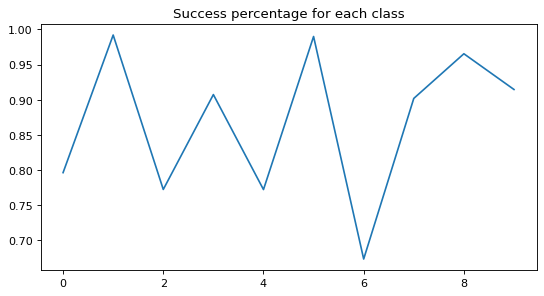

In [68]:
classes = [i for i in range(10)]
class_wise_global_success_rate = cmat_l1.diagonal()
figure(figsize=(8, 4), dpi=80)
plt.plot(classes,class_wise_global_success_rate)
plt.title('Success percentage for each class')

In [69]:
print('Class with highest success rate is ',np.where(class_wise_global_success_rate==max(class_wise_global_success_rate))[0][0])
print('Class with lowest success rate is ',np.where(class_wise_global_success_rate==min(class_wise_global_success_rate))[0][0])

Class with highest success rate is  1
Class with lowest success rate is  6
